# Running all algorithms independently using generated dataset 

## Génération de la matrice de distances

In [2]:
from random import *
import pandas
from generateMatrix import generateMatrix

grapheTable = []
PointsLivraisonTable = []

#génération aléatoire des villes
DepartementTravail = randint(1,93)

#génération des matrices de degré différents
listeDegre = [10,20,30,40,50,65,80,100,120,140]

for degre in listeDegre:
    MatriceDistances, PointsLivraison = generateMatrix(DepartementTravail, degre)
    grapheTable.append(MatriceDistances)
    PointsLivraisonTable.append(PointsLivraison)

print(f"Choix du département pour la tournée : {str(DepartementTravail)}")

# Affichage de la matrice 140x140
pandas.DataFrame(grapheTable[0])

Choix du département pour la tournée : 87


,0,1,2,3,4,5,6,7,8,9
0,0,46,60,71,16,43,53,11,58,35
1,46,0,14,28,36,11,43,56,15,13
2,60,14,0,16,51,22,51,70,8,27
3,71,28,16,0,64,38,67,82,14,42
4,16,36,51,64,0,31,37,22,50,24
5,43,11,22,38,31,0,32,52,25,8
6,53,43,51,67,37,32,0,56,56,34
7,11,56,70,82,22,52,56,0,68,44
8,58,15,8,14,50,25,56,68,0,28
9,35,13,27,42,24,8,34,44,28,0


## I - Choix des algorithmes

### Algorithmes sans librairie

In [3]:
#import algorithmes
from Algorithms.tabu import tabu_method
from Algorithms.genetic import genetic_method
from Algorithms.antColony import antColony_method
from generateMaps import generateMaps

# Variables partagés par tous les algorithmes
vehicules = 5

# Variables partagés entre l'algorithme tabou et l'algorithme genetique
maxIterations = 1

# Variables de l'algorithme génétique
mutationRate = 1
populationSize = 40
maxGen = 10000

print("---DONE---")

---DONE---


In [4]:
# Methode pour afficher les résultats
def printer(route, dist):
    """ Affiche les résultats d'un algorithme """
    globalDist = 0
    for i in range(len(route)):
        print(f"camion {i+1} : {route[i+1]} || distance = {dist[i]} km")
        globalDist += dist[i]
    print(f"Total distance = {globalDist} km")
    print("\n")

## Tabou

In [5]:
tabu_route, tabu_dist = tabu_method(grapheTable[1], vehicules, maxIterations)
printer(tabu_route, tabu_dist)

# Décommenter le code ci-dessous pour avoir un carte avec la solution
# generateMaps(tabu_route, PointsLivraisonTable[1], "tabu")

camion 1 : [0, 17, 11, 14, 15, 0] || distance = 141 km
camion 2 : [0, 7, 13, 6, 1, 0] || distance = 64 km
camion 3 : [0, 19, 9, 5, 4, 0] || distance = 190 km
camion 4 : [0, 2, 10, 8, 18, 0] || distance = 168 km
camion 5 : [0, 16, 3, 12, 0] || distance = 102 km
Total distance = 665 km




## Colonie de fourmis

In [6]:
ant_route, ant_dist = antColony_method(grapheTable[1], vehicules)
printer(ant_route, ant_dist)

# Décommenter le code ci-dessous pour avoir un carte avec la solution
# generateMaps(ant_route, PointsLivraisonTable[1], "antColony")

camion 1 : [0, 1, 8, 11, 19, 0] || distance = 130 km
camion 2 : [0, 16, 12, 2, 9, 0] || distance = 142 km
camion 3 : [0, 7, 3, 14, 17, 0] || distance = 88 km
camion 4 : [0, 10, 4, 18, 6, 0] || distance = 165 km
camion 5 : [0, 15, 13, 5, 0] || distance = 173 km
Total distance = 698 km




## Génétique

In [7]:
genetic_route, genetic_dist = genetic_method(mutationRate, populationSize, maxGen, maxIterations, vehicules, grapheTable[1])
printer(genetic_route, genetic_dist)

# Décommenter le code ci-dessous pour avoir un carte avec la solution
# generateMaps(genetic_route, PointsLivraisonTable[1], "genetic")

camion 1 : [0, 0] || distance = 0 km
camion 2 : [0, 4, 18, 0] || distance = 151 km
camion 3 : [0, 14, 12, 15, 1, 6, 0] || distance = 149 km
camion 4 : [0, 17, 13, 19, 9, 5, 2, 0] || distance = 146 km
camion 5 : [0, 7, 10, 8, 16, 3, 11, 0] || distance = 125 km
Total distance = 571 km




## Evaluation

In [8]:
import time

#evaluation du temps d'exécution et du résultat
timeTabou = []
timeFourmi = []
timeGenetic = []
worstTabou = []
worstFourmi = []
worstGenetic = []

for graphe in grapheTable:
    #evaluation tabou
    t = time.process_time()
    tabu_route, tabu_dist = tabu_method(graphe, vehicules, maxIterations)
    elapsed_time = time.process_time() - t
    timeTabou.append(elapsed_time)
    worstTabou.append(max(tabu_dist))

    #evaluation colonie de fourmis
    t = time.process_time()
    ant_route, ant_dist = antColony_method(graphe, vehicules)
    elapsed_time = time.process_time() - t
    timeFourmi.append(elapsed_time)
    worstFourmi.append(max(ant_dist))
    
    #evaluation génétique
    t = time.process_time()
    genetic_route, genetic_dist = genetic_method(mutationRate, populationSize, maxGen, maxIterations, vehicules, graphe)
    elapsed_time = time.process_time() - t
    timeGenetic.append(elapsed_time)
    worstGenetic.append(max(genetic_dist))

print("---DONE---")

---DONE---


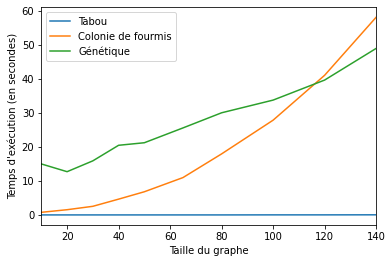

In [22]:
import matplotlib.pyplot as plt

#graphe temps d'exécution
plt.plot(listeDegre,timeTabou)
plt.plot(listeDegre,timeFourmi)
plt.plot(listeDegre,timeGenetic)

plt.legend(['Tabou', 'Colonie de fourmis', 'Génétique'])
plt.xlabel("Taille du graphe")
plt.ylabel("Temps d'exécution (en secondes)")
plt.xlim([10, 140])

plt.show()

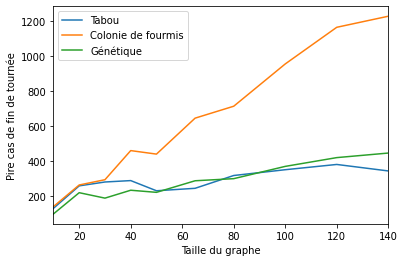

In [23]:
#graphe pire cas possible
plt.plot(listeDegre,worstTabou)
plt.plot(listeDegre,worstFourmi)
plt.plot(listeDegre,worstGenetic)

plt.legend(['Tabou', 'Colonie de fourmis', 'Génétique'])
plt.xlabel("Taille du graphe")
plt.ylabel("Pire cas de fin de tournée")
plt.xlim([10, 140])

plt.show()

## Algorithmes avec librairies

In [10]:
from Algorithms.or_tools import ortools_method
from Algorithms.vrpy import vrpy_methode

# Variable des métaheuristiques de or_tools
time_limit = 3

### Tabu avec OR-Tools

In [11]:
ortools_tabu_route, ortools_tabu_dist = ortools_method(grapheTable[1], vehicules, "tabu", time_limit)
printer(ortools_tabu_route, ortools_tabu_dist)

# Décommenter le code ci-dessous pour avoir un carte avec la solution
# generateMaps(ortools_tabu_route, PointsLivraisonTable[1], "ortools_tabu")

camion 1 : [0, 7, 2, 16, 10, 3, 15, 12, 8, 14, 11, 17, 0] || distance = 147 km
camion 2 : [0, 18, 4, 0] || distance = 151 km
camion 3 : [0, 0] || distance = 0 km
camion 4 : [0, 0] || distance = 0 km
camion 5 : [0, 6, 1, 13, 5, 9, 19, 0] || distance = 101 km
Total distance = 399 km




### Recuit simulé avec OR-Tools

In [30]:
ortools_sa_route, ortools_sa_dist = ortools_method(grapheTable[1], vehicules, "simulated_annealing", time_limit)
printer(ortools_sa_route, ortools_sa_dist)

# Décommenter le code ci-dessous pour avoir un carte avec la solution
# generateMaps(ortools_sa_route, PointsLivraisonTable[1], "ortools_sa")

camion 1 : [0, 7, 2, 16, 10, 3, 15, 12, 8, 14, 11, 17, 0] || distance = 147 km
camion 2 : [0, 18, 4, 0] || distance = 151 km
camion 3 : [0, 0] || distance = 0 km
camion 4 : [0, 0] || distance = 0 km
camion 5 : [0, 6, 1, 13, 5, 9, 19, 0] || distance = 101 km
Total distance = 399 km




### Methode Heuristique (Chemin le plus court)

In [33]:
ortools_heuristic_route, ortools_heuristic_dist = ortools_method(grapheTable[1], vehicules, "default", time_limit)
printer(ortools_heuristic_route, ortools_heuristic_dist)

# Décommenter le code ci-dessous pour avoir un carte avec la solution
# generateMaps(ortools_heuristic_route, PointsLivraisonTable[7], "ortools_heuristic")

camion 1 : [0, 81, 21, 62, 69, 49, 5, 4, 64, 48, 23, 95, 31, 39, 12, 56, 43, 93, 59, 54, 28, 3, 0] || distance = 144 km
camion 2 : [0, 63, 60, 37, 41, 1, 9, 35, 30, 19, 68, 71, 97, 79, 75, 34, 57, 0] || distance = 152 km
camion 3 : [0, 99, 94, 32, 25, 50, 77, 7, 46, 42, 67, 17, 33, 26, 22, 47, 24, 44, 36, 14, 0] || distance = 160 km
camion 4 : [0, 89, 38, 83, 2, 10, 52, 88, 80, 86, 45, 8, 61, 84, 70, 16, 27, 73, 76, 74, 0] || distance = 157 km
camion 5 : [0, 51, 18, 20, 55, 92, 29, 98, 90, 82, 78, 85, 6, 66, 91, 11, 72, 15, 53, 87, 96, 58, 40, 65, 13, 0] || distance = 159 km
Total distance = 772 km




### Clarke & Wrighte avec VRPY

In [70]:
##### NE MARCHE PAS ACTUELLEMENT #####

# import copy
# grapheCopy = copy.deepcopy(grapheTable)
# vrpy_route, vrpy_cost = vrpy_methode(grapheCopy[1], PointsLivraisonTable[1], vehicules)
# printer(vrpy_route, vrpy_cost)

INFO:vrpy.vrp:Clarke & Wright solution found with value 697.0 and 6 vehicles
INFO:vrpy.vrp:Greedy solution found with value 364.0 and 1 vehicles
INFO:vrpy.vrp:iteration 0, 100000


Exception: problem Infeasible

### Tests des algo

In [17]:
#evaluation du temps d'exécution et du résultat
time_Tabu_Ortools = []
time_SA_Ortools = []
time_CW_VRPY = []
time_heuristic_Ortools = []
worst_tabu_ortools = []
worst_sa_ortools = []
worst_cw_vrpy = []
worst_heuristic_ortools = []

for graphe in grapheTable:
    #evaluation tabou OR-Tools
    t = time.process_time()
    ortools_tabu_route, ortools_tabu_dist = ortools_method(graphe, vehicules, "tabu", time_limit)
    elapsed_time = time.process_time() - t
    time_Tabu_Ortools.append(elapsed_time)
    worst_tabu_ortools.append(max(ortools_tabu_dist))

    #evaluation SA OR-Tools
    t = time.process_time()
    ortools_sa_route, ortools_sa_dist = ortools_method(graphe, vehicules, "simulated_annealing", time_limit)
    elapsed_time = time.process_time() - t
    time_SA_Ortools.append(elapsed_time)
    worst_sa_ortools.append(max(ortools_sa_dist))

    #evaluation SA OR-Tools
    t = time.process_time()
    ortools_heuristic_route, ortools_heuristic_dist = ortools_method(graphe, vehicules, "default", time_limit)
    elapsed_time = time.process_time() - t
    time_heuristic_Ortools.append(elapsed_time)
    worst_heuristic_ortools.append(max(ortools_heuristic_dist))

print("---DONE---")

---DONE---


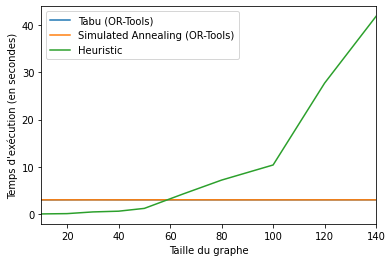

In [34]:
import matplotlib.pyplot as plt

#graphe temps d'exécution
plt.plot(listeDegre,time_Tabu_Ortools)
plt.plot(listeDegre,time_SA_Ortools)
plt.plot(listeDegre,time_heuristic_Ortools)

plt.legend(['Tabu (OR-Tools)', 'Simulated Annealing (OR-Tools)', 'Heuristic'])
plt.xlabel("Taille du graphe")
plt.ylabel("Temps d'exécution (en secondes)")
plt.xlim([10, 140])

plt.show()

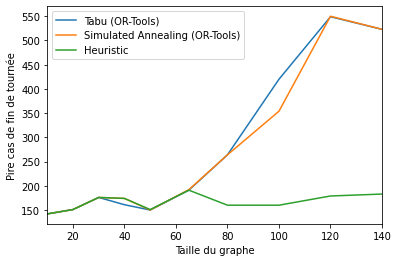

In [22]:
#graphe pire cas possible
plt.plot(listeDegre,worst_tabu_ortools)
plt.plot(listeDegre,worst_sa_ortools)
plt.plot(listeDegre,worst_heuristic_ortools)

plt.legend(['Tabu (OR-Tools)', 'Simulated Annealing (OR-Tools)', 'Heuristic'])
plt.xlabel("Taille du graphe")
plt.ylabel("Pire cas de fin de tournée")
plt.xlim([10, 140])

plt.show()